# EDA for Food Recognition

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os


# Food recognition
import PIL
from os import listdir
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
import pandas as pd

30612 training labels loaded
Start loading 200 images
Loading at 0.0%
Loading at 50.0%
Loading at 100.0%
Reached MAX_IMAGE count of 200
21
train_1.jpg


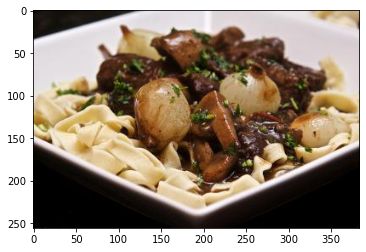

29
train_2.jpg


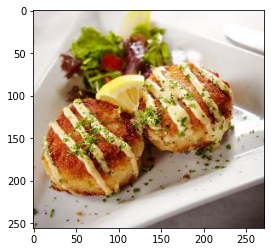

17
train_3.jpg


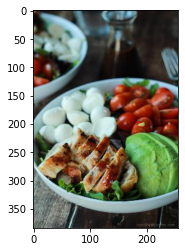

21
train_4.jpg


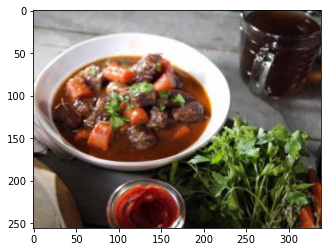

50
train_5.jpg


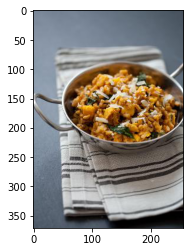

8
train_6.jpg


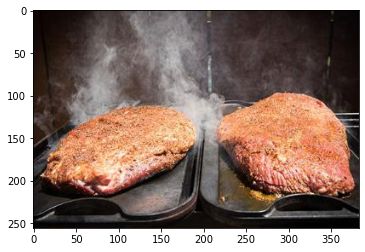

42
train_7.jpg


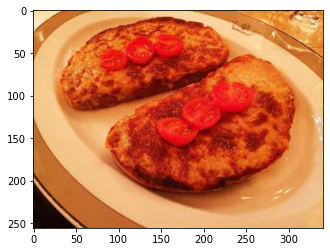

68
train_8.jpg


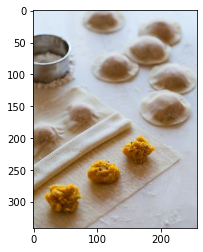

10
train_9.jpg


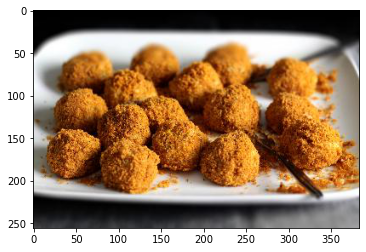

9
train_10.jpg


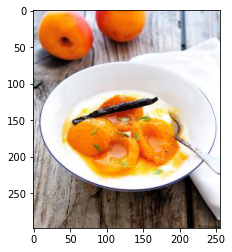

In [2]:
# Local data directories
DATA_DIR = '/Users/dj/Documents/GitHub/Data/food-recognition-challenge-2021'
TRAIN_DIR = DATA_DIR + '/train_set/train_set/'
TEST_DIR = DATA_DIR + '/test_set/test_set/'

# Maximum number of images to load (there are 30k)
MAX_IMAGE = 200

# Filter for a subset of labels in the images to load
FILTER_LABEL = []

# load all the training labels
train_labels = pd.read_csv(DATA_DIR + '/train_labels.csv', dtype={'label': object})
if (len(FILTER_LABEL) > 0):
    train_labels = train_labels[train_labels['label'].isin(FILTER_LABEL)].copy().reset_index()
print('{} training labels loaded'.format(len(train_labels)))  

# load all the training images
train_images = list()
imcount = 0
if MAX_IMAGE == 0:
    MAX_IMAGE = len(train_labels)

print('Start loading {} images'.format(MAX_IMAGE))
for filename in train_labels['img_name']:
    # Load image
    img = Image.open(TRAIN_DIR + filename)
    
    # Resize image to the same shape
    # TODO: Don't squash all images into the same size
    #img = img.resize((256,256), Image.ANTIALIAS)
    # Convert image to numpy array
    img_data = np.array(img)

    # Store loaded image
    train_images.append(img_data)

    # Show progress
    if imcount % 100 == 0:
        print('Loading at {:.1f}%'.format(imcount/min(len(train_labels), MAX_IMAGE)*100))

    # Stop after X images   
    imcount += 1
    if imcount > MAX_IMAGE:
        print('Reached MAX_IMAGE count of '+str(MAX_IMAGE))
        break

# Show 10 samples
for i in range(0,min(10, len(train_labels))):
    print(train_labels['label'][i])
    print(train_labels['img_name'][i])
    pyplot.imshow(train_images[i])
    pyplot.show()

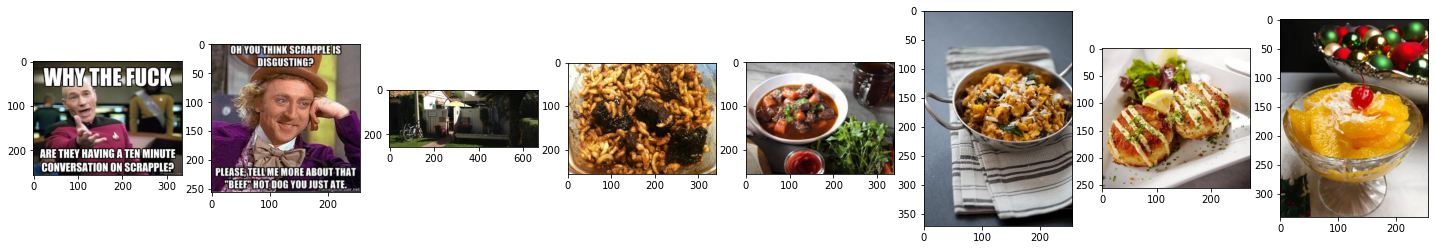

In [21]:
numbers = [6302, 5999, 5719, 123, 4, 5, 2, 34]
fig = plt.figure(figsize=(25, 25))
columns = 8
rows = 1
for i in np.arange(1, len(numbers) + 1):
    img = Image.open(TRAIN_DIR + 'train_' + str(numbers[i-1]) + '.jpg')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

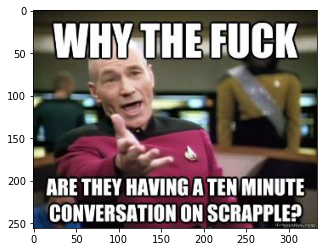

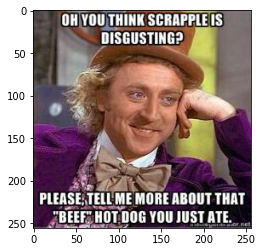

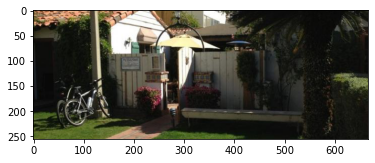

In [3]:
numbers = [6302, 5999, 5719]
for i in numbers:
    img = Image.open(TRAIN_DIR + 'train_' + str(i) + '.jpg')
    img_data = np.array(img)
    pyplot.imshow(img_data)
    pyplot.show()

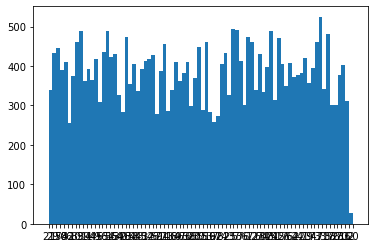

In [4]:
d = train_labels["label"]
plt.hist(d, bins = 80)
plt.show()

In [5]:
train_labels.label.value_counts()[ train_labels.label.value_counts() < 300]

66    299
55    289
13    286
19    284
40    284
59    278
78    274
67    257
42    255
20     27
Name: label, dtype: int64

In [80]:
bs = train_labels[train_labels["label"] == "20"] # 28, 67
bs.shape

(27, 2)

In [ ]:
for i in np.arange(40,50):
    slic = bs.iloc[i,]
    img = Image.open(TRAIN_DIR + slic['img_name'])
    img_data = np.array(img)
    pyplot.imshow(img_data)
    pyplot.show()

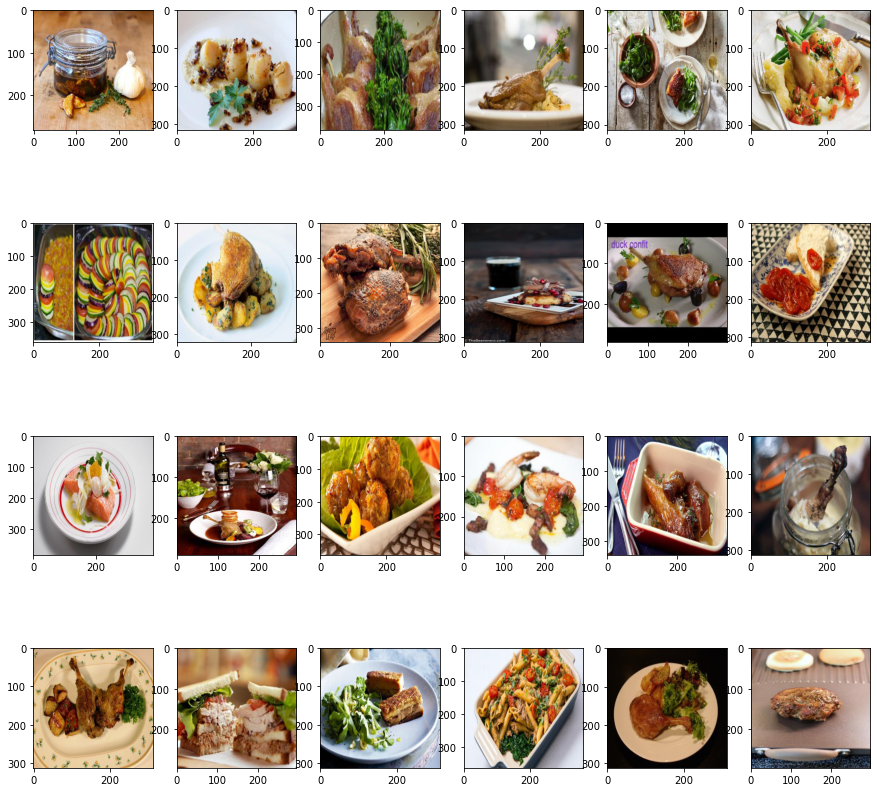

In [5]:
#####################################
### GETTING AN OVERVIEW OF A CLASS###
#####################################
bs = train_labels[train_labels["label"] == "12"] # 28, 67
fig = plt.figure(figsize=(15, 15))
fig_range = np.arange(24,48)
columns = 6
rows = 4
for i in np.arange(1, len(fig_range) + 1):
    numbers = fig_range[i-1]
    slic = bs.iloc[numbers,]
    img = Image.open(TRAIN_DIR + slic['img_name']) # If you want to have it grayscale ->  .convert('LA')
    sqrWidth = np.ceil(np.sqrt(img.size[0]*img.size[1])).astype(int)
    img_resize = img.resize((sqrWidth, sqrWidth))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_resize)
plt.show()